<a href="https://colab.research.google.com/github/shipra-bhadauria/Deep-Learning_practice/blob/main/LSTM_AirlinePassenger_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# LSTM for international airline passengers problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# fix random seed for reproducibility
numpy.random.seed(7)

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving airline_passengers.csv to airline_passengers.csv


In [ ]:
# load the dataset
df = read_csv('airline_passengers.csv')
df.head(3)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132


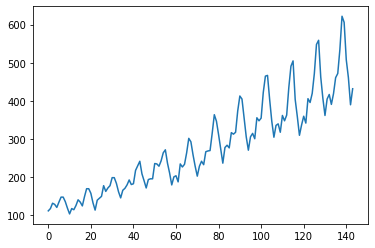

In [ ]:
dataframe=df.iloc[:,1]
plt.plot(dataframe)
plt.show()

In [ ]:
dataset = dataframe.values
dataset = dataset.astype('float32')
dataset

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218., 230., 242.,
       209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264.,
       272., 237., 211., 180., 201., 204., 188., 235., 227., 234., 264.,
       302., 293., 259., 229., 203., 229., 242., 233., 267., 269., 270.,
       315., 364., 347., 312., 274., 237., 278., 284., 277., 317., 313.,
       318., 374., 413., 405., 355., 306., 271., 306., 315., 301., 356.,
       348., 355., 422., 465., 467., 404., 347., 305., 336., 340., 318.,
       362., 348., 363., 435., 491., 505., 404., 359., 310., 337., 360.,
       342., 406., 396., 420., 472., 548., 559., 463., 407., 362., 405.,
       417., 391., 419., 461., 472., 535., 622., 606., 508., 461., 390.,
       432.], dtype=float32)

In [ ]:
dataset.shape

(144,)

In [ ]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(-1,1))
dataset.shape

(144, 1)

In [ ]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
print(len(train),len(test))

96 48


In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
print(trainX.shape,trainY.shape)

(94, 1, 1) (94,)


In [ ]:
print(trainX[0],trainY[0])

[[0.01544401]] 0.027027026


In [ ]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=1,validation_data=(testX, testY))

Epoch 1/100
94/94 [==============================] - 8s 9ms/step - loss: 0.0460 - val_loss: 0.1836
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.0144 - val_loss: 0.1235
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.0092 - val_loss: 0.1002
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.0128 - val_loss: 0.0956
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.0107 - val_loss: 0.0833
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.0097 - val_loss: 0.0772
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.0097 - val_loss: 0.0677
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.0064 - val_loss: 0.0576
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.0071 - val_loss: 0.0499
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.0064 - val_loss: 0.0413
Epoch 11/

In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [ ]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [ ]:
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))

print('Test Score: %.2f RMSE' % (testScore))

In [ ]:
len(trainPredict)

94

In [ ]:
len(dataset)

144

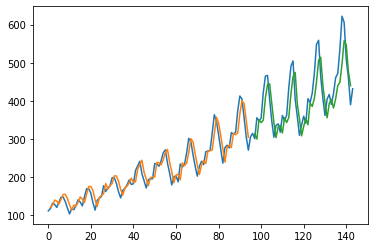

In [ ]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset) ## returns a new array of same shape and type as the given array
trainPredictPlot.shape
trainPredictPlot[:, :] = numpy.nan

trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()